## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/Train_clean.csv')

#### Show Top 5 Records

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
X = df.drop(columns=['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [7]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [8]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### Seperating features according to category

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(8523, 1601)

#### Preparing X and Y variables

In [15]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((6818, 1601), (1705, 1601))

#### Create an Evaluate Function to give all metrics after model Training

In [16]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 997.3966
- Mean Absolute Error: 743.1169
- R2 Score: 0.6637
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1273.9239
- Mean Absolute Error: 944.6528
- R2 Score: 0.4029


Lasso
Model performance for Training set
- Root Mean Squared Error: 1135.9513
- Mean Absolute Error: 843.4605
- R2 Score: 0.5638
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1072.1381
- Mean Absolute Error: 793.5113
- R2 Score: 0.5771


Ridge
Model performance for Training set
- Root Mean Squared Error: 1005.4298
- Mean Absolute Error: 750.1226
- R2 Score: 0.6583
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1182.8038
- Mean Absolute Error: 878.1667
- R2 Score: 0.4853


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 996.4672
- Mean Absolute Error: 713.9602
- R2 Scor

### Results

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.592914
1,Lasso,0.577081
6,XGBRegressor,0.567403
5,Random Forest Regressor,0.559421
3,K-Neighbors Regressor,0.504363
2,Ridge,0.485268
0,Linear Regression,0.402907
8,AdaBoost Regressor,0.285872
4,Decision Tree,0.240869


## Linear Regression

In [20]:
cat_model = CatBoostRegressor()
cat_model =cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.055449
0:	learn: 1669.9725089	total: 16.6ms	remaining: 16.5s
1:	learn: 1620.9187718	total: 32.9ms	remaining: 16.4s
2:	learn: 1576.1534180	total: 49ms	remaining: 16.3s
3:	learn: 1535.3270863	total: 65.4ms	remaining: 16.3s
4:	learn: 1496.3438701	total: 81.1ms	remaining: 16.1s
5:	learn: 1460.4094495	total: 97.4ms	remaining: 16.1s
6:	learn: 1429.8812671	total: 113ms	remaining: 16.1s
7:	learn: 1399.1122044	total: 129ms	remaining: 16s
8:	learn: 1371.6355624	total: 144ms	remaining: 15.9s
9:	learn: 1345.5442266	total: 160ms	remaining: 15.9s
10:	learn: 1322.3397758	total: 176ms	remaining: 15.8s
11:	learn: 1301.4633201	total: 192ms	remaining: 15.8s
12:	learn: 1282.7513569	total: 208ms	remaining: 15.8s
13:	learn: 1265.4509071	total: 223ms	remaining: 15.7s
14:	learn: 1247.9963512	total: 239ms	remaining: 15.7s
15:	learn: 1233.5206364	total: 254ms	remaining: 15.6s
16:	learn: 1221.0325718	total: 270ms	remaining: 15.6s
17:	learn: 1207.9238737	total: 286ms	remaining: 15.6s
18:	le

158:	learn: 1058.2893097	total: 3.22s	remaining: 17s
159:	learn: 1058.1340933	total: 3.24s	remaining: 17s
160:	learn: 1057.8315498	total: 3.26s	remaining: 17s
161:	learn: 1057.5671597	total: 3.29s	remaining: 17s
162:	learn: 1057.4210536	total: 3.31s	remaining: 17s
163:	learn: 1057.2141855	total: 3.34s	remaining: 17s
164:	learn: 1057.0541361	total: 3.36s	remaining: 17s
165:	learn: 1056.8135474	total: 3.38s	remaining: 17s
166:	learn: 1056.6491187	total: 3.41s	remaining: 17s
167:	learn: 1056.4574854	total: 3.43s	remaining: 17s
168:	learn: 1056.2355517	total: 3.45s	remaining: 17s
169:	learn: 1056.1312195	total: 3.47s	remaining: 17s
170:	learn: 1055.9563291	total: 3.5s	remaining: 17s
171:	learn: 1055.7861495	total: 3.52s	remaining: 16.9s
172:	learn: 1055.6584901	total: 3.54s	remaining: 16.9s
173:	learn: 1055.4391944	total: 3.56s	remaining: 16.9s
174:	learn: 1055.2492706	total: 3.58s	remaining: 16.9s
175:	learn: 1055.0956308	total: 3.6s	remaining: 16.9s
176:	learn: 1054.9062687	total: 3.63s	

311:	learn: 1033.0619230	total: 6.5s	remaining: 14.3s
312:	learn: 1032.9893621	total: 6.52s	remaining: 14.3s
313:	learn: 1032.8736743	total: 6.54s	remaining: 14.3s
314:	learn: 1032.6688372	total: 6.56s	remaining: 14.3s
315:	learn: 1032.5745085	total: 6.58s	remaining: 14.2s
316:	learn: 1032.4156095	total: 6.6s	remaining: 14.2s
317:	learn: 1032.3019362	total: 6.62s	remaining: 14.2s
318:	learn: 1032.1806870	total: 6.64s	remaining: 14.2s
319:	learn: 1031.9823326	total: 6.66s	remaining: 14.1s
320:	learn: 1031.7530394	total: 6.68s	remaining: 14.1s
321:	learn: 1031.6361582	total: 6.7s	remaining: 14.1s
322:	learn: 1031.4685709	total: 6.72s	remaining: 14.1s
323:	learn: 1031.2314290	total: 6.74s	remaining: 14.1s
324:	learn: 1031.0220057	total: 6.76s	remaining: 14.1s
325:	learn: 1030.8261600	total: 6.79s	remaining: 14s
326:	learn: 1030.5909681	total: 6.81s	remaining: 14s
327:	learn: 1030.4576634	total: 6.83s	remaining: 14s
328:	learn: 1030.3630840	total: 6.85s	remaining: 14s
329:	learn: 1030.1321

461:	learn: 1011.8103711	total: 9.72s	remaining: 11.3s
462:	learn: 1011.6895337	total: 9.74s	remaining: 11.3s
463:	learn: 1011.6152673	total: 9.76s	remaining: 11.3s
464:	learn: 1011.5077951	total: 9.79s	remaining: 11.3s
465:	learn: 1011.4060429	total: 9.81s	remaining: 11.2s
466:	learn: 1011.2400633	total: 9.83s	remaining: 11.2s
467:	learn: 1011.0475052	total: 9.85s	remaining: 11.2s
468:	learn: 1010.9592454	total: 9.87s	remaining: 11.2s
469:	learn: 1010.8481450	total: 9.89s	remaining: 11.2s
470:	learn: 1010.7569370	total: 9.91s	remaining: 11.1s
471:	learn: 1010.5525970	total: 9.93s	remaining: 11.1s
472:	learn: 1010.4271367	total: 9.95s	remaining: 11.1s
473:	learn: 1010.3375781	total: 9.97s	remaining: 11.1s
474:	learn: 1010.2590476	total: 9.99s	remaining: 11s
475:	learn: 1010.1572733	total: 10s	remaining: 11s
476:	learn: 1010.0061623	total: 10s	remaining: 11s
477:	learn: 1009.8559985	total: 10.1s	remaining: 11s
478:	learn: 1009.7739262	total: 10.1s	remaining: 11s
479:	learn: 1009.5536454

620:	learn: 992.2708886	total: 13.2s	remaining: 8.04s
621:	learn: 992.0778568	total: 13.2s	remaining: 8.01s
622:	learn: 991.9017142	total: 13.2s	remaining: 7.99s
623:	learn: 991.7850755	total: 13.2s	remaining: 7.97s
624:	learn: 991.6626818	total: 13.3s	remaining: 7.95s
625:	learn: 991.4788077	total: 13.3s	remaining: 7.93s
626:	learn: 991.2826689	total: 13.3s	remaining: 7.91s
627:	learn: 991.1368912	total: 13.3s	remaining: 7.88s
628:	learn: 991.0446082	total: 13.3s	remaining: 7.86s
629:	learn: 990.9746490	total: 13.4s	remaining: 7.84s
630:	learn: 990.8557855	total: 13.4s	remaining: 7.82s
631:	learn: 990.7610766	total: 13.4s	remaining: 7.8s
632:	learn: 990.6479534	total: 13.4s	remaining: 7.78s
633:	learn: 990.5340193	total: 13.4s	remaining: 7.76s
634:	learn: 990.3944370	total: 13.5s	remaining: 7.74s
635:	learn: 990.2905031	total: 13.5s	remaining: 7.71s
636:	learn: 990.1642651	total: 13.5s	remaining: 7.69s
637:	learn: 990.0760439	total: 13.5s	remaining: 7.67s
638:	learn: 989.9526652	total

776:	learn: 974.0459513	total: 16.4s	remaining: 4.71s
777:	learn: 973.9841614	total: 16.5s	remaining: 4.69s
778:	learn: 973.8259389	total: 16.5s	remaining: 4.67s
779:	learn: 973.6810906	total: 16.5s	remaining: 4.65s
780:	learn: 973.6238526	total: 16.5s	remaining: 4.63s
781:	learn: 973.4235697	total: 16.5s	remaining: 4.61s
782:	learn: 973.3594339	total: 16.6s	remaining: 4.59s
783:	learn: 973.2221532	total: 16.6s	remaining: 4.57s
784:	learn: 973.0972594	total: 16.6s	remaining: 4.55s
785:	learn: 972.9040525	total: 16.6s	remaining: 4.53s
786:	learn: 972.8181408	total: 16.6s	remaining: 4.5s
787:	learn: 972.7754241	total: 16.7s	remaining: 4.48s
788:	learn: 972.7168526	total: 16.7s	remaining: 4.46s
789:	learn: 972.6520267	total: 16.7s	remaining: 4.44s
790:	learn: 972.5288147	total: 16.7s	remaining: 4.42s
791:	learn: 972.4105606	total: 16.8s	remaining: 4.4s
792:	learn: 972.3201461	total: 16.8s	remaining: 4.38s
793:	learn: 972.1799407	total: 16.8s	remaining: 4.36s
794:	learn: 972.0937941	total:

932:	learn: 959.2248153	total: 19.7s	remaining: 1.41s
933:	learn: 959.1215081	total: 19.7s	remaining: 1.39s
934:	learn: 958.9372209	total: 19.7s	remaining: 1.37s
935:	learn: 958.8419158	total: 19.7s	remaining: 1.35s
936:	learn: 958.7382715	total: 19.7s	remaining: 1.33s
937:	learn: 958.6727119	total: 19.8s	remaining: 1.31s
938:	learn: 958.5650620	total: 19.8s	remaining: 1.28s
939:	learn: 958.4932460	total: 19.8s	remaining: 1.26s
940:	learn: 958.4118832	total: 19.8s	remaining: 1.24s
941:	learn: 958.3712080	total: 19.8s	remaining: 1.22s
942:	learn: 958.2778013	total: 19.9s	remaining: 1.2s
943:	learn: 958.1964882	total: 19.9s	remaining: 1.18s
944:	learn: 958.1363849	total: 19.9s	remaining: 1.16s
945:	learn: 957.9973097	total: 19.9s	remaining: 1.14s
946:	learn: 957.9112278	total: 19.9s	remaining: 1.12s
947:	learn: 957.8081263	total: 20s	remaining: 1.09s
948:	learn: 957.6534505	total: 20s	remaining: 1.07s
949:	learn: 957.4766815	total: 20s	remaining: 1.05s
950:	learn: 957.2931899	total: 20s	

## Plot y_pred and y_test

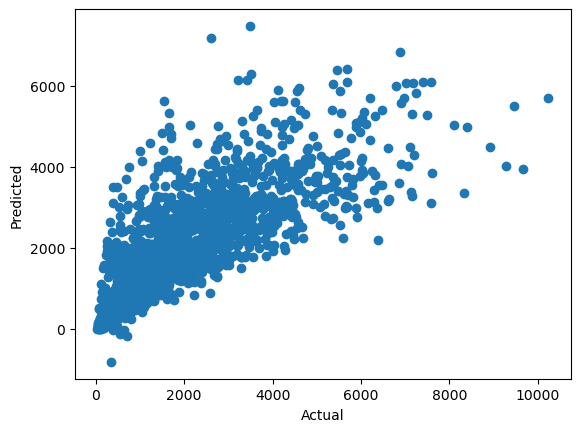

In [21]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

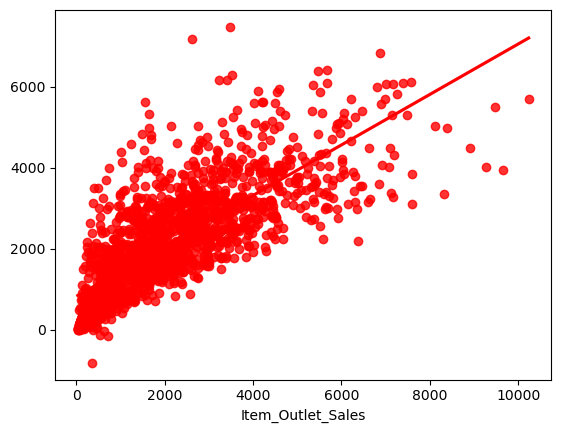

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [23]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
7503,1743.0644,1298.070924,444.993476
2957,356.8688,675.637654,-318.768854
7031,377.5086,739.827360,-362.318760
1084,5778.4782,4697.618340,1080.859860
856,2356.9320,3258.043647,-901.111647
...,...,...,...
7205,3004.0896,1703.038465,1301.051135
3257,890.8404,2156.536725,-1265.696325
6346,629.1810,700.205382,-71.024382
6318,253.0040,655.547682,-402.543682
